In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from plotly.offline import init_notebook_mode,iplot,iplot_mpl,download_plotlyjs,enable_mpl_offline
import plotly.graph_objs as go
import os

%matplotlib inline

init_notebook_mode(connected=True)

<h1 style='text-align:center'>Was Russ Season an MVP Season?</h1>
<img src="https://cdn-s3.si.com/s3fs-public/2017/03/16/russell-westbrook-mvp-stephen-curry-comments.jpg">
<h3>Hypothesis</h3>
<p>In my opinion the mvp of the league was lebron james when I first look at the stats. He shot a much better field goal percentage, averaged high ppg,apg, and rpg. Also, his team won more. It's hard to believe that Russell won mvp with all those turnovers and missed shots, but let's take a look</p>

In [2]:
players = pd.read_csv("Players.csv",usecols=["Player","height","weight","collage","born","birth_city","birth_state"])
players[["height","weight","born"]] = players[["height","weight","born"]].fillna(0).astype(int)
season = pd.read_csv("Seasons_Stats.csv")
season[["Year","Age","G","GS","AST","STL","BLK","PTS","PF","TOV","FT","FTA","2P","2PA","3P","3PA","ORB","TRB","DRB"]] = season[["Year","Age","G","GS","AST","STL","BLK","PTS","PF","TOV","FT","FTA","2P","2PA","3P","3PA","ORB","TRB","DRB"]].fillna(0).astype(int)
season = season[season["Year"] >= 2010]
season["PPG"] = season["PTS"] / season["G"]
season["APG"] = season["AST"] / season["G"]
season["3PG"] = season["3P"] / season["G"]
season["RPG"] = season["TRB"] / season["G"]
season["FTPG"] = season["FTA"] / season["G"]
season["TOPG"] = season["TOV"] / season["G"]
season["PPG"] = round(season["PPG"],1)

In [3]:
pd.options.mode.chained_assignment = None  # default='warn'

In [4]:
stats = season[["Year","Player","Pos","Age","Tm","PER","PTS","PPG","APG","3PG","RPG","FTPG","TOPG","FG%","3P%","2P%","FT%",'WS','BPM','OWS','DWS']].reset_index()

In [5]:
seventeen = stats[(stats['Year'] == 2017) & (stats['PPG'] >= 15)]

In [6]:
def changePosition(x):
    if ("SG" in x) or ("PG" in x):
        return "Guard"
    elif ("SF" in x) or ("PF" in x):
        return "Forward"
    else:
        return "Center"

In [7]:
seventeen['Position'] = seventeen['Pos'].apply(changePosition)

In [8]:
mask1 = (seventeen['Player'] == 'Lou Williams') & (seventeen['Tm'] != 'TOT')
mask2 = (seventeen['Player'] == 'DeMarcus Cousins') & (seventeen['Tm'] != 'TOT')
seventeen = seventeen[~(mask1 | mask2)]

In [10]:
# fig = plt.figure(figsize=(12,8))
# ax = fig.add_axes([0,0,.7,.7])
# ax.set_title('WS vs. Pts')
trace = go.Scatter(x = seventeen['WS'],y = seventeen['PPG'],mode = 'markers+text',text=seventeen['Player'],textposition = 'middle right')

data = [trace]
layout = dict(title = 'WS vs. PPG',
              hovermode = 'closest',
              yaxis = dict(zeroline = False,title="PPG"),
              xaxis = dict(zeroline = False,range=(0,18),title="Win Share")
             )

fix = dict(data=data,layout=layout)

iplot(fix,filename='basic-scatter')

I wanted to see how important Points per game are to win share. James Harden averages just under 30 and his win share is ahead of Russell Westbrooks who did win mvp. Those 12 assist per game to 3 point shooters definitely help. 

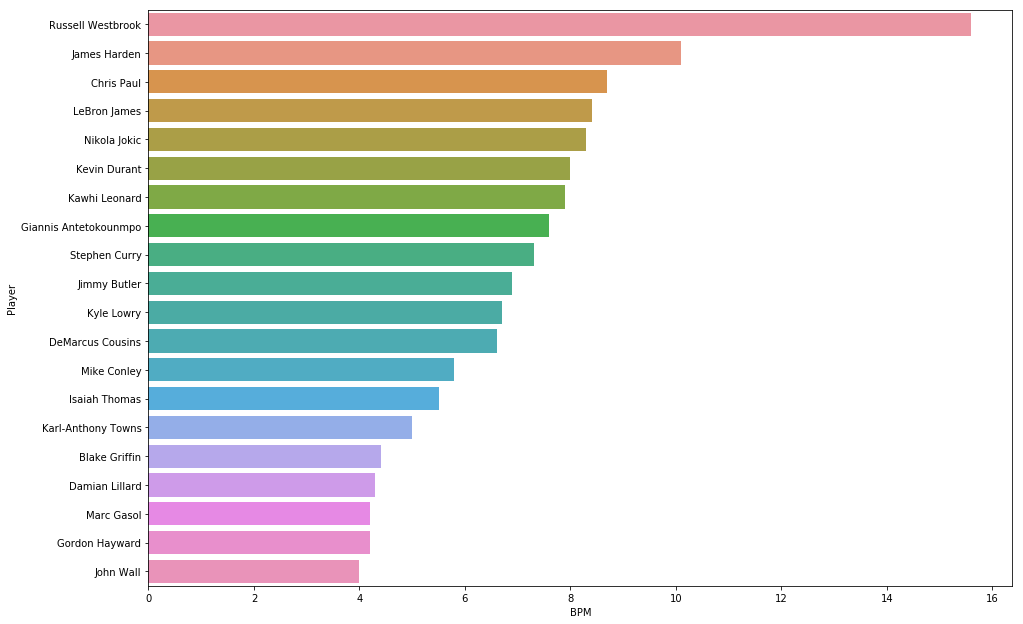

In [11]:
fig = plt.figure(figsize=(12,8))
axes = fig.add_axes([0,0,1,1])
sns.barplot(x="BPM",y="Player",data=seventeen.sort_values("BPM",ascending=False).head(20))

BPM - Box plus minus has been one of the key metrics throughout the years to show who are the most important players in the league. This is more a boxed score metric which shows a player's quality and contribution to his teams. Russell Westbrook's triple double season is put on display here.

In [12]:
guards = seventeen[seventeen['Position'] == 'Guard'].sort_values('PER',ascending=False).head(25)
forwards = seventeen[seventeen['Position'] == 'Forward'].sort_values('PER',ascending=False).head(25)
centers = seventeen[seventeen['Position'] == 'Center'].sort_values('PER',ascending=False).head(25)
guard = go.Box(y=guards['PER'],name="Guards",boxpoints='outliers')
forward = go.Box(y=forwards['PER'],name="Forwards")
center = go.Box(y=centers['PER'],name="Centers")

data = [guard,forward,center]
iplot(data)

### The highest PER in categories above

Guards tend to post the highest PPR in the new nba. Forwards who are asked to do much more are even with Centers while centers have the higher box median than Forwards.

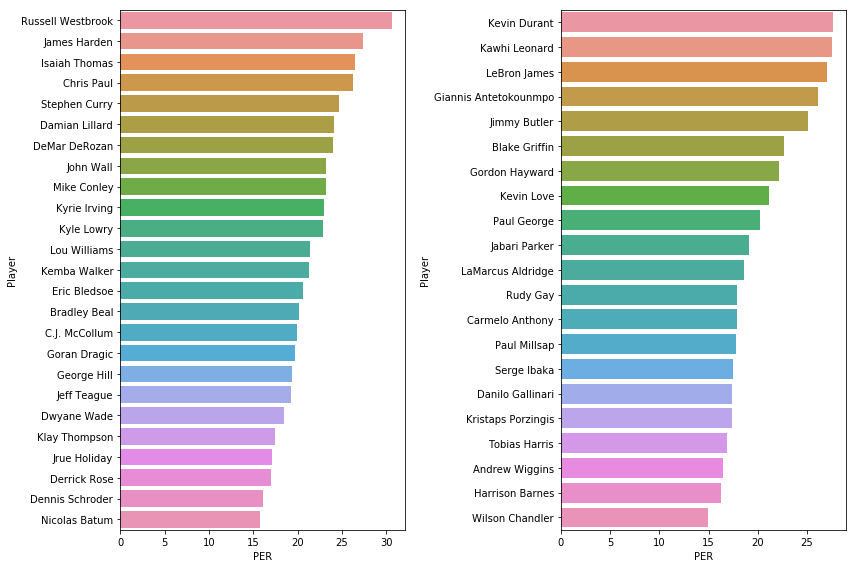

In [13]:
fig = plt.figure(figsize=(12,8))
fig.add_subplot(1,2,1)
sns.barplot(x="PER",y="Player",data=guards.sort_values('PER',ascending=False))

fig.add_subplot(1,2,2)
sns.barplot(x="PER",y="Player",data=forwards.sort_values('PER',ascending=False),orient='h')

plt.tight_layout()
plt.show()

Former Teammates KD and Westbrook are at the top of the Player efficiency category. This is a bit of a shocker to me as I thought Russell Westbrook's turnovers would take away from his PER. Let's use hollinger's reference guide to filter out mvp candidates.

In [14]:
def hollingerMVP(x):
    if x >= 35.0:
        return '1. All-Time Great Season'
    elif x >= 30.0 and x < 35:
        return '2. Runaway MVP Candidate'
    elif x >= 27.5 and x < 30:
        return '3. Strong MVP Candidate'
    elif x >= 25.0 and x < 27.5:
        return '4. Weak MVP Candidate'
    else:
        return "Not MVP Candidate"

In [15]:
seventeen['MVP Candidacy'] = seventeen['PER'].apply(hollingerMVP)

In [16]:
mvpCandidates = seventeen[seventeen['MVP Candidacy'] != 'Not MVP Candidate']

In [17]:
mvpCandidates = mvpCandidates.sort_values("MVP Candidacy").reset_index()
mvpCandidates.drop(["level_0","index"],axis=1,inplace=True)

In [18]:
mvpCandidates.head(8)

,Year,Player,Pos,Age,Tm,PER,PTS,PPG,APG,3PG,...,FG%,3P%,2P%,FT%,WS,BPM,OWS,DWS,Position,MVP Candidacy
0,2017,Russell Westbrook,PG,28,OKC,30.6,2558,31.6,10.370370,2.469136,...,0.425,0.343,0.459,0.845,13.1,15.6,8.5,4.6,Guard,2. Runaway MVP Candidate
1,2017,Anthony Davis,C,23,NOP,27.5,2099,28.0,2.093333,0.533333,...,0.504,0.299,0.524,0.802,11.0,3.7,5.9,5.1,Center,3. Strong MVP Candidate
2,2017,Kevin Durant,SF,28,GSW,27.6,1555,25.1,4.838710,1.887097,...,0.537,0.375,0.608,0.875,12.0,8.0,8.0,4.0,Forward,3. Strong MVP Candidate
3,2017,Kawhi Leonard,SF,25,SAS,27.5,1888,25.5,3.513514,1.986486,...,0.485,0.381,0.529,0.880,13.6,7.9,8.9,4.7,Forward,3. Strong MVP Candidate
4,2017,Giannis Antetokounmpo,SF,22,MIL,26.1,1832,22.9,5.425000,0.612500,...,0.521,0.272,0.563,0.770,12.4,7.6,7.9,4.5,Forward,4. Weak MVP Candidate
5,2017,Jimmy Butler,SF,27,CHI,25.1,1816,23.9,5.486842,1.197368,...,0.455,0.367,0.477,0.865,13.8,6.9,10.1,3.8,Forward,4. Weak MVP Candidate
6,2017,DeMarcus Cousins,C,26,TOT,25.7,1942,27.0,4.611111,1.819444,...,0.452,0.360,0.483,0.772,7.6,6.6,3.8,3.8,Center,4. Weak MVP Candidate
7,2017,James Harden,PG,27,HOU,27.3,2356,29.1,11.185185,3.234568,...,0.440,0.347,0.530,0.847,15.0,10.1,11.5,3.6,Guard,4. Weak MVP Candidate


According to Hollinger Russell Westbrook still wins MVP, but the rest of the mvp race is different. Anthony Davis and KD who didn't even make it into the top 5 of the actual mvp voting came in 2nd and 3rd. Better yet, KD and Giannis didn't even make 1st team all nba. Maybe KD missing games played a part in that, but Giannis should have made it. Jimmy butler barely made an all nba which shows why he made it over Paul George. Let's look at the previous 5 years to see if a trend of the highest PER wins MVP.

In [19]:
sixteen = []
fifteen = []
fourteen = []
thirteen = []
twelve = []
eleven = []
current = []
for i,row in season.sort_values('PER',ascending=False).iterrows():
    if row['Year'] == 2016 and row['MP'] > 2000:
        sixteen.append(row)
    elif row['Year'] == 2015 and row['MP'] > 2000:
        fifteen.append(row)
    elif row['Year'] == 2014 and row['MP'] > 2000:
        fourteen.append(row)
    elif row['Year'] == 2013 and row['MP'] > 2000:
        thirteen.append(row)
    elif row['Year'] == 2017 and row['MP'] > 2000:
        current.append(row)
    elif row['Year'] == 2012 and row['MP'] > 2000:
        twelve.append(row)
    elif row['Year'] == 2011 and row['MP'] > 2000:
        eleven.append(row)
sixteen = pd.DataFrame(sixteen,columns=season.columns).head(5)
fifteen = pd.DataFrame(fifteen,columns=season.columns).head(5)
fourteen = pd.DataFrame(fourteen,columns=season.columns).head(5)
thirteen = pd.DataFrame(thirteen,columns=season.columns).head(5)
current = pd.DataFrame(current,columns=season.columns).head(5)
eleven = pd.DataFrame(eleven,columns=season.columns).head(5)
twelve = pd.DataFrame(twelve,columns=season.columns).head(5)
masterFrame = pd.concat([current,sixteen,fourteen,thirteen,fifteen,eleven,twelve])

In [20]:
masterFrame['MVP Candidacy'] = masterFrame['PER'].apply(hollingerMVP)

In [21]:
masterFrame = masterFrame.sort_values(["Year","MVP Candidacy"],ascending=True)
df = masterFrame[['Year','Player','PER','PPG','APG','RPG','MVP Candidacy','WS']].reset_index()
df

,index,Year,Player,PER,PPG,APG,RPG,MVP Candidacy,WS
0,20812,2011,LeBron James,27.3,26.7,7.012658,7.468354,4. Weak MVP Candidate,15.6
1,20795,2011,Dwight Howard,26.1,22.9,1.371795,14.076923,4. Weak MVP Candidate,14.4
2,21070,2011,Dwyane Wade,25.6,25.5,4.552632,6.381579,4. Weak MVP Candidate,12.8
3,20872,2011,Kevin Love,24.3,20.2,2.520548,15.232877,Not MVP Candidate,11.4
4,20600,2011,Kobe Bryant,23.9,25.3,4.731707,5.109756,Not MVP Candidate,10.3
5,21395,2012,LeBron James,30.7,27.1,6.241935,7.935484,2. Runaway MVP Candidate,14.5
6,21520,2012,Chris Paul,27.0,19.8,9.050000,3.550000,4. Weak MVP Candidate,12.7
7,21264,2012,Kevin Durant,26.2,28.0,3.500000,7.984848,4. Weak MVP Candidate,12.2
8,21453,2012,Kevin Love,25.4,26.0,2.018182,13.345455,4. Weak MVP Candidate,10.0
9,21376,2012,Dwight Howard,24.2,20.6,1.925926,14.537037,Not MVP Candidate,7.7


### PER title = MVP title?

Above I have taken the top 5 PERs from the past 7 years. Let's see if the PER Champ won the MVP race every year. If not, why was that?

In [22]:
def mvp(player,year):
    if ('Curry' in player) & (year == 2016):
        return 'MVP'
    elif ('Curry' in player) and (year == 2015):
        return 'MVP'
    elif ('Westbrook' in player) and (year == 2017):
        return 'MVP'
    elif ('Durant' in player) and (year == 2014):
        return 'MVP'
    elif ('LeBron' in player) and (year == 2013):
        return 'MVP'
    elif ('LeBron' in player) and (year == 2012):
        return 'MVP'
    elif ('Rose' in player) and (year == 2011):
        return 'MVP'

In [23]:
df['MVP?'] = df.apply(lambda x:mvp(x['Player'],x['Year']),axis=1)

In [24]:
def highlight(val):
    color = 'red' if val == 'MVP' else 'black'
    return 'color: %s' % color

In [25]:
export = df.style.applymap(highlight)

In [25]:
df

,index,Year,Player,PER,PPG,APG,RPG,MVP Candidacy,WS,MVP?
0,20812,2011,LeBron James,27.3,26.7,7.012658,7.468354,4. Weak MVP Candidate,15.6,None
1,20795,2011,Dwight Howard,26.1,22.9,1.371795,14.076923,4. Weak MVP Candidate,14.4,None
2,21070,2011,Dwyane Wade,25.6,25.5,4.552632,6.381579,4. Weak MVP Candidate,12.8,None
3,20872,2011,Kevin Love,24.3,20.2,2.520548,15.232877,Not MVP Candidate,11.4,None
4,20600,2011,Kobe Bryant,23.9,25.3,4.731707,5.109756,Not MVP Candidate,10.3,None
5,21395,2012,LeBron James,30.7,27.1,6.241935,7.935484,2. Runaway MVP Candidate,14.5,MVP
6,21520,2012,Chris Paul,27.0,19.8,9.050000,3.550000,4. Weak MVP Candidate,12.7,None
7,21264,2012,Kevin Durant,26.2,28.0,3.500000,7.984848,4. Weak MVP Candidate,12.2,None
8,21453,2012,Kevin Love,25.4,26.0,2.018182,13.345455,4. Weak MVP Candidate,10.0,None
9,21376,2012,Dwight Howard,24.2,20.6,1.925926,14.537037,Not MVP Candidate,7.7,None


In [27]:
trace = go.Scatter(x=df['Year'],y=df['PER'],mode = 'markers+text',text=df['Player'],textposition = 'middle right')
layout = dict(title = "MVP",hovermode='closest')
data = [trace]
fig = go.Figure(data=data,layout=layout)
iplot(fig)

# Let's dive into this chart and the above data.
<ul>
<li>2011 - Derrick Rose won mvp. Many people thought it wasn't the right decision and the data actually proves that. He's not even top 5 in PER.</li>
<li>2012 - Lebron james posted a 30.7 and ran away with mvp.</li>
<li>2013 - Lebron wins another PER and wins another mvp.</li>
<li>2014 - Kevin Durant wins PER and wins his first mvp.</li>
<li>2015 - Stephen Curry wins his first MVP but he finished 3rd in the PER category? Well the first and second place PER guys did not make the Playoffs! winning does matter in the MVP race.</li>
<li>2016 - Steph curry obliterates PER and wins the first unanimous mvp.</li>
<li>2017 - Russell Westbrook post the highest PER and wins his first mvp.</li>
</ul>